***
# <font color=navy size=9>Frequência</font>
***

## Abrindo o arquivo de dados
Inicialmente iremos importar o arquivo de dados do IBGE modificado.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dados.csv')
df

,Sexo,Idade,Cor,Tempo de Estudo,Renda,Altura
0,Masculino,23,Parda,12,800,1.60
1,Feminino,23,Branca,12,1150,1.74
2,Feminino,35,Parda,15,880,1.76
3,Masculino,46,Branca,6,3500,1.78
4,Feminino,47,Parda,9,150,1.69
...,...,...,...,...,...,...
76835,Feminino,46,Branca,11,812,1.69
76836,Masculino,30,Preta,7,1500,1.79
76837,Masculino,32,Parda,12,1300,1.83
76838,Masculino,57,Parda,4,1500,1.73


## Frequência
Iremos utilizar o método "value_counts()" para verificar a frequência de ocorrência dos valores da coluna "Sexo".

In [4]:
freq = df['Sexo'].value_counts()
freq

Masculino    53250
Feminino     23590
Name: Sexo, dtype: int64

Utilizar o método "value_counts()" para calcular a porcentagem.

In [5]:
perc = df['Sexo'].value_counts(normalize=True) * 100
perc

Masculino    69.299844
Feminino     30.700156
Name: Sexo, dtype: float64

Com as variáveis "freq" e "perc" podemos criar uma tabela de **Frequência** e **Porcentagem**:

In [6]:
tabela = pd.DataFrame({'Frequência': freq, 'Porcentagem': perc})
tabela.rename_axis('Sexo', axis = 'columns', inplace = True)
tabela

Sexo,Frequência,Porcentagem
Masculino,53250,69.299844
Feminino,23590,30.700156


Podemos criar uma tabela de frequências relacionando colunas.
> Neste caso, iremos relacionar "Sexo" e "Cor".

In [7]:
tabela = pd.crosstab(df['Sexo'], df['Cor'])
tabela

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


Podemos criar uma tabela de frequências em porcentagem relacionando colunas.
> Neste caso, iremos relacionar "Sexo" e "Cor".

In [8]:
tabela = pd.crosstab(df['Sexo'], df['Cor'], normalize = True) * 100
tabela

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.152264,12.520822,0.131442,14.135867,3.759761
Masculino,0.305830,28.883394,0.333160,32.617126,7.160333


Podemos criar uma tabela de frequências relacionando 2 colunas e um terceiro parâmetro.
> Neste caso, iremos relacionar "Sexo" e "Cor" e adicionar renda média.

In [9]:
tabela = pd.crosstab(df['Sexo'],  df['Cor'], aggfunc = 'mean', values = df['Renda'])
tabela

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,3027.341880,2109.866750,2464.386139,1176.758516,1134.596400
Masculino,4758.251064,2925.744435,1081.710938,1659.577425,1603.861687


## Distribuição de Frequências
Iremos criar classes de acordo com a renda. Utilizaremos as seguintes classes:

> Classe baixa: Renda abaixo de <b>2.100,00</b> reais

> Classe média: Renda entre <b>2.100,00</b> a <b>10.500,00</b> reais

> Classe alta: Renda acima de <b>10.500,00</b> reais

Antes de criar as classes vamos verificar os limites da coluna "Renda".

Utilizaremos o método "max()" para o valor máximo e o método "min()" para o valor mínimo.

In [10]:
min = df['Renda'].min()
min

0

In [11]:
max = df['Renda'].max()
max

200000

Iremos utilizar os valores para criar a lista de rendas.

In [12]:
nomes = ['Baixa', 'Média', 'Alta']
valores = [min, 2100, 10500, max]

Iremos utilizar o método "cut()" para criar a série com as classes.

In [13]:
classes = pd.cut(x = df['Renda'], bins = valores, labels = nomes, include_lowest = True)
classes

0        Baixa
1        Baixa
2        Baixa
3        Média
4        Baixa
         ...  
76835    Baixa
76836    Baixa
76837    Baixa
76838    Baixa
76839    Baixa
Name: Renda, Length: 76840, dtype: category
Categories (3, object): ['Baixa' < 'Média' < 'Alta']

Vamos verificar as frequências das classes:

In [14]:
freq = pd.value_counts(classes)
freq

Baixa    58892
Média    16596
Alta      1352
Name: Renda, dtype: int64

Vamos verificar as porcentagens das classes:

In [15]:
perc = pd.value_counts(classes, normalize = True) * 100
perc

Baixa    76.642374
Média    21.598126
Alta      1.759500
Name: Renda, dtype: float64

Agora iremos criar a tabela de Distribuição de Frequências:

In [16]:
dist = pd.DataFrame({'Frequência': freq, 'Porcentagem': perc})
dist.rename_axis('Classe', axis = 'columns', inplace = True)
dist

Classe,Frequência,Porcentagem
Baixa,58892,76.642374
Média,16596,21.598126
Alta,1352,1.759500


## Gráfico de barras
O gráfico em barras consiste em construir retângulos ou barras, um dos eixos é proporcional à magnitude a ser representada (neste caso é a frequência), sendo o outro eixo arbitrário, porém igual para todas as barras (neste caso são as classes). Essas barras são dispostas paralelamente umas às outras, horizontal ou verticalmente.

> Iremos utilizar as bibliotecas "seaborn" e "matplotlib" para criar o **Gráfico de Barras**.

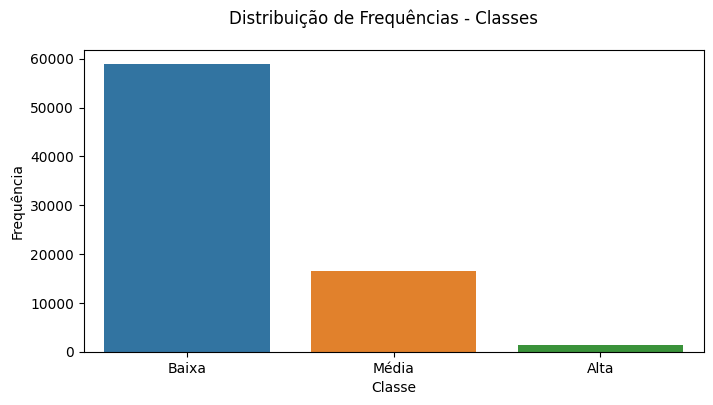

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4), dpi=100)

sns.barplot(dist.index, dist['Frequência'])

plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.suptitle('Distribuição de Frequências - Classes');

## Definição do número de classes
No exemplo anterior, eu decidi dividir os dados em três classes. Existe um método que pode ajudar na hora de definir o número de classes. O método é **A Regra de Sturges**.

### Regra de Sturges

## $$k = 1 + \frac {10}{3}\log_{10}n$$

> k é o número de classes;

> n é o número de dados.

Para obter o número de linhas do conjunto de dados é só utilizar a função "len()".

In [18]:
n = len(df)
n

76840

In [19]:
from numpy import log10

In [20]:
k = 1 + ((10/3) * log10(n))
k

17.285291187298853

Podemos arredondar o resultado de "k" com a função "round()".
> Em round(a, b), "a" é o valor que você deseja arredondar e "b" é o número de casas decimais.

In [21]:
from numpy import round

In [22]:
k = round(k, 0)
k

17.0

Utilizaremos a função "int()" para tornar o valor "k" em um número inteiro.

In [23]:
k = int(k)
k

17

Agora iremos criar as classes com o valor "k".

In [24]:
classes = pd.cut(x = df['Renda'], bins = k, include_lowest = True)
freq = pd.value_counts(classes, normalize = True)
perc = pd.value_counts(classes, normalize = True) * 100

In [25]:
dist = pd.DataFrame({'Frequência': freq, 'Porcentagem': perc})
dist.rename_axis('Intervalo da Classe', axis = 'columns', inplace = True)
dist

Intervalo da Classe,Frequência,Porcentagem
"(-200.001, 11764.706]",0.983784,98.378449
"(11764.706, 23529.412]",0.013300,1.330036
"(23529.412, 35294.118]",0.002199,0.219938
"(35294.118, 47058.824]",0.000247,0.024727
"(47058.824, 58823.529]",0.000208,0.020822
"(94117.647, 105882.353]",0.000078,0.007808
"(58823.529, 70588.235]",0.000065,0.006507
"(70588.235, 82352.941]",0.000052,0.005206
"(188235.294, 200000.0]",0.000039,0.003904
"(82352.941, 94117.647]",0.000013,0.001301


## Histograma
O histograma é uma representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de barras colocadas lado a lado, onde a área de cada barra é proporcional à frequência da classe que ele representa.

Iremos utilizar as bibliotecas "seaborn" e "matplotlib" para criar o **Histograma**.

> Note que irei utilizar o valor de "k" da regra de Sturges em "bins" para definir o número de classes do gráfico.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

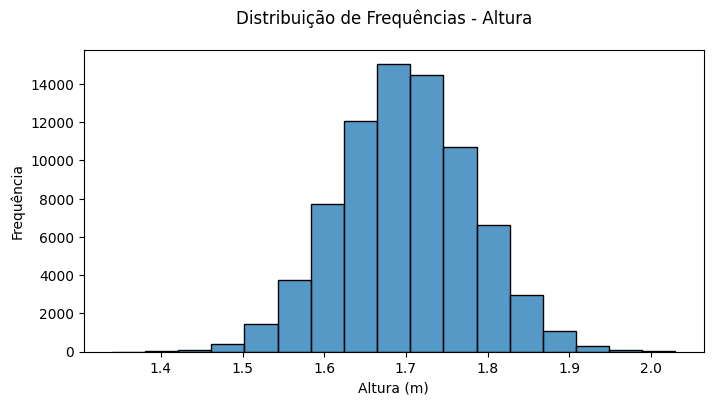

In [27]:
plt.figure(figsize=(8, 4), dpi=100)

sns.histplot(df['Altura'], bins = k)

plt.xlabel('Altura (m)')
plt.ylabel('Frequência')
plt.suptitle('Distribuição de Frequências - Altura');

***